# Grab A Stock!

## Customer Profiling
The code snippet given below is designed to collect, validate, and store user profile information. Below are the notes explaining each part of the code:

1. **Initialization of User Profiles DataFrame**:
   - A DataFrame `user_profiles` is initialized with columns "First Name", "Last Name", "Age", and "Location". This DataFrame is used to store user profile information.

2. **Function: add_user_profile**:
   - This function adds a new user profile to the global `user_profiles` DataFrame.
   - It takes four parameters: `first_name`, `last_name`, `age`, and `location`.
   - A new profile is created as a dictionary and appended to the `user_profiles` DataFrame.


3. **Function: get_user_input**:
   - A general-purpose function to get user input from the console.
   - It handles input of different types (e.g., string, integer) and includes exception handling for invalid input.
   - The function keeps prompting the user until a valid input is provided.


4. **Function: validate_age**:
   - This function validates the user's age.
   - If the age is below 18, the program prints a message and exits, restricting usage to users above 18.


5. **Function: validate_location**:
   - This function validates the user's location.
   - It checks if the provided location is within a predefined list of valid locations (Canadian provinces and territories).
   - If the location is not in the list, the program prints a message and exits.


6. **Collecting User Information**:
   - The script collects the user's first and last names, age, and location through console input.
   - The first and last names are capitalized, and the location is converted to uppercase.


7. **Validating Age and Location**:
   - The script validates the entered age and location using the `validate_age` and `validate_location` functions.


8. **Creating and Displaying User Profile**:
   - After validation, a user profile is created using the collected information.
   - This profile is displayed to the user.


9. **Adding Profile to Global DataFrame**:
   - The collected profile information is added to the `user_profiles` DataFrame using the `add_user_profile` function.


10. **Displaying All User Profiles**:
    - Finally, the script prints the updated `user_profiles` DataFrame, showing all stored user profiles.

This application requires user registration with basic information and has specific age and location requirements. The use of DataFrames for storing user information makes it convenient for further data manipulation and analysis.

In [1]:
# Import Libraries
import pandas as pd
import yfinance as yf
import numpy as np
# 'For Backtesting Feature' import backtrader as bt
from sklearn.preprocessing import StandardScaler, label_binarize
from pandas.tseries.offsets import DateOffset
#AdaBoost & SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 
# Plotting
import matplotlib.pyplot as plt

In [2]:
# Initialize an empty dataframe to store user profiles
user_profiles = pd.DataFrame(columns=["First Name", "Last Name", "Age", "Location"])

def add_user_profile(first_name, last_name, age, location):
    """ Add a new user profile to the global dataframe """
    global user_profiles
    new_profile = {"First Name": first_name, "Last Name": last_name, "Age": age, "Location": location}
    user_profiles = user_profiles.append(new_profile, ignore_index=True)

def get_user_input(prompt, input_type=str):
    """ General function to get user input and handle exceptions """
    while True:
        try:
            return input_type(input(prompt))
        except ValueError:
            print(f"Please enter a valid {input_type.__name__}")

def validate_age(age):
    """ Validate user's age """
    if age < 18:
        print("Sorry, you need to be above 18 to use this application. Have a good day!")
        quit()

def validate_location(location, valid_locations):
    """ Validate user's location """
    if location not in valid_locations:
        print("You must reside in Canada to use this application. Have a good day!")
        quit()

# Collecting user's name
first_name = get_user_input("Hello! Please insert your first name: ").capitalize()
last_name = get_user_input("Please insert your last name: ").capitalize()

# Collecting and validating user's age
age = get_user_input(f"Welcome {first_name} {last_name}! Please input your age: ", int)
validate_age(age)

# Collecting and validating user's location
valid_locations = ["ON", "BC", "YT", "NT", "NU", "AB", "SK", "MB", "QC", "NL", "NB", "PE", "NS"]
location = get_user_input("Please declare your province (e.g., BC for British Columbia): ").upper()
validate_location(location, valid_locations)

# Creating user profile dataframe
profile_data = {"First Name": [first_name], "Last Name": [last_name], "Age": [age], "Location": [location]}
user_profile_df = pd.DataFrame(profile_data)
print("Here is your profile information:")
print(user_profile_df)

# After collecting all user information, add the profile to the global dataframe
add_user_profile(first_name, last_name, age, location)

# Display the updated dataframe
print("All user profiles:")
print(user_profiles)

Hello! Please insert your first name: Moh
Please insert your last name: Jaiswal
Welcome Moh Jaiswal! Please input your age: 23
Please declare your province (e.g., BC for British Columbia): ON
Here is your profile information:
  First Name Last Name  Age Location
0        Moh   Jaiswal   23       ON
All user profiles:
  First Name Last Name Age Location
0        Moh   Jaiswal  23       ON


### Automated Stock Market Analysis and Trading Signal Generation System

1. **User Input Function (`get_user_input`)**:
   - This function asks the user to input something (like a stock ticker symbol).
   - It checks if the input is valid. For example, if it expects text, it makes sure the user doesn't type numbers.


2. **Fetch Stock Data (`fetch_stock_data`)**:
   - This function gets historical stock data from Yahoo Finance based on a stock ticker (like "AAPL" for Apple).
   - It checks if the data for the given ticker symbol is available and handles any errors (like if the ticker symbol doesn't exist).


3. **Calculate Simple Moving Average (`calculate_sma`)**:
   - This calculates the average stock price over a certain number of days, known as the "Simple Moving Average" (SMA).
   - SMAs are used to smooth out price data and identify trends.


4. **Calculate Relative Strength Index (`calculate_rsi`)**:
   - This calculates the Relative Strength Index (RSI), a momentum indicator.
   - RSI helps in identifying overbought or oversold conditions in a stock's price.


5. **Preprocess Stock Data (`preprocess_stock_data`)**:
   - This function adds new columns to the stock data for analysis, like "Actual Returns", "Fast SMA", "Slow SMA", and "RSI".
   - It removes any rows with missing values to clean the data.


6. **Generate Buy/Sell Signals (`generate_signals`)**:
   - This function creates signals to buy or sell based on technical indicators (SMA and RSI).
   - A "buy signal" is generated when the RSI is low (below 30) and the Fast SMA crosses above the Slow SMA.
   - A "sell signal" is generated when the RSI is high (above 70) and the Fast SMA crosses below the Slow SMA.


7. **Stock Ticker Input**:
   - The user is asked to input the stock ticker symbol for which they want recommendations.


8. **Fetching and Preparing Stock Data**:
   - The stock data is fetched and prepared using the functions defined above.


9. **Creating 'Strategy Returns' Column**:
   - A new column called "Strategy Returns" is created in the data.
   - This column calculates the returns based on the buy/sell signals from the technical indicators.


10. **Display Processed Data**:
    - Finally, the processed stock data with the generated buy/sell signals is displayed.
    - The number of buy and sell signals is also shown.


In summary, the code is a tool for stock market analysis. It fetches historical stock data, applies technical analysis techniques to identify buying and selling opportunities, and calculates the potential returns from following these signals.

In [15]:
# Enhanced user input function
def get_user_input(prompt, input_type=str):
    while True:
        try:
            user_input = input_type(input(prompt))
            if input_type == str and not user_input.isalpha():
                raise ValueError("Invalid input. Please enter alphabetic characters only.")
            return user_input
        except ValueError as e:
            print(f"Invalid input: {e}")

def fetch_stock_data(ticker_symbol, period="5y"):
    """ Fetch historical stock data from Yahoo Finance API with error handling """
    try:
        stock_data = yf.Ticker(ticker_symbol).history(period=period)
        if stock_data.empty:
            raise ValueError("No data found for the ticker.")
        return stock_data
    except Exception as e:
        print(f"Error fetching data for {ticker_symbol}: {e}")
        quit()

def calculate_sma(data, window):
    """ Calculate Simple Moving Average """
    return data.rolling(window=window).mean()

def calculate_rsi(data, window=14):
    """ Calculate the Relative Strength Index """
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def preprocess_stock_data(stock_df):
    """ Add technical indicators to the stock data """
    stock_df["Actual Returns"] = stock_df["Close"].pct_change()
    stock_df["Fast SMA"] = calculate_sma(stock_df["Close"], 15)  # Short window
    stock_df["Slow SMA"] = calculate_sma(stock_df["Close"], 100)  # Long window
    stock_df["RSI"] = calculate_rsi(stock_df["Close"])

    # Drop initial rows with NaN values
    stock_df.dropna(inplace=True)
    return stock_df

def generate_signals(stock_df):
    """ Generate buy/sell signals based on technical indicators """
    stock_df['Signal'] = 0

    # Buy signal - RSI below 30 and fast SMA crosses above slow SMA
    buy_signals = (stock_df['RSI'] < 30) & (stock_df['Fast SMA'] > stock_df['Slow SMA'])
    
    # Sell signal - RSI above 70 and fast SMA crosses below slow SMA
    sell_signals = (stock_df['RSI'] > 70) & (stock_df['Fast SMA'] < stock_df['Slow SMA'])

    stock_df.loc[buy_signals, 'Signal'] = 1
    stock_df.loc[sell_signals, 'Signal'] = -1
    return stock_df

# Getting stock ticker input
ticker = get_user_input("Please input the stock ticker for recommendation: ", str).upper()

# Fetching and preparing stock data
stock_df = fetch_stock_data(ticker)
processed_stock_df = preprocess_stock_data(stock_df)
signal_stock_df = generate_signals(processed_stock_df)

# Creating a new column in the stock_signals dataframe called "Strategy Returns" and storing the product of corresponding datapoints in the "Actual Returns" and "Signal" column
signal_stock_df['Strategy Returns'] = signal_stock_df['Actual Returns'] * signal_stock_df['Signal'].shift()

# Displaying processed data with signals
print("Processed Stock Data with Signals:")
print(signal_stock_df.tail(5))
print("Value counts for buy and sell signals (1 being buy and -1 being sell):", signal_stock_df['Signal'].value_counts())

Please input the stock ticker for recommendation: AAPL
Processed Stock Data with Signals:
                                 Open        High         Low       Close  \
Date                                                                        
2024-01-18 00:00:00-05:00  186.089996  189.139999  185.830002  188.630005   
2024-01-19 00:00:00-05:00  189.330002  191.949997  188.820007  191.559998   
2024-01-22 00:00:00-05:00  192.300003  195.330002  192.259995  193.889999   
2024-01-23 00:00:00-05:00  195.020004  195.750000  193.830002  195.179993   
2024-01-24 00:00:00-05:00  195.419998  196.380005  194.339996  194.500000   

                             Volume  Dividends  Stock Splits  Actual Returns  \
Date                                                                           
2024-01-18 00:00:00-05:00  78005800        0.0           0.0        0.032571   
2024-01-19 00:00:00-05:00  68741000        0.0           0.0        0.015533   
2024-01-22 00:00:00-05:00  60133900        0.0    

In [16]:
signal_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1159 entries, 2019-06-18 00:00:00-04:00 to 2024-01-24 00:00:00-05:00
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              1159 non-null   float64
 1   High              1159 non-null   float64
 2   Low               1159 non-null   float64
 3   Close             1159 non-null   float64
 4   Volume            1159 non-null   int64  
 5   Dividends         1159 non-null   float64
 6   Stock Splits      1159 non-null   float64
 7   Actual Returns    1159 non-null   float64
 8   Fast SMA          1159 non-null   float64
 9   Slow SMA          1159 non-null   float64
 10  RSI               1159 non-null   float64
 11  Signal            1159 non-null   int64  
 12  Strategy Returns  1158 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 126.8 KB


## Feature engineering and Data preprocessing in machine learning 

### Before we run machine learning models, we must make sure that our data is standardized, we can do the following by: 
 
 1. Creating DataFrame X for Features (Fast and Slow SMAs): This step involves creating a new DataFrame (X) that contains the features (in this case, Fast SMA and Slow SMA) that will be used to train a machine learning model. The .shift().dropna() is used to align the features with the target variable (Signal) correctly, ensuring that you're predicting future values, not past ones.

 2. Creating Target Variable y: This is where you define your target variable (y), which in this case is the Signal column. The target variable is what the model will learn to predict.

 3. Splitting the Data into Training and Test Sets: You're selecting a training period and an ending period for training data. This is crucial for evaluating the performance of your model. You train the model on a set of data and then test it on a separate set to see how well it can generalize to new, unseen data.

 4. Scaling the Features: Feature scaling is a crucial step in data preprocessing, especially for algorithms that are sensitive to the scale of the input features (like SVMs, neural networks, etc.). StandardScaler standardizes features by removing the mean and scaling to unit variance. This step helps to improve the performance and training stability of the model.

In [17]:
# Creating a new dataframe called X to store fast and slow SMAs
X = signal_stock_df[['Fast SMA', 'Slow SMA']].shift().dropna()

#Create the target set selecting the Signal column and assiging it to y
y = signal_stock_df['Signal']

# Define training period start and end
training_begin = X.index.min()
training_end = X.index.min() + DateOffset(months=24)

# Split the data into training and test sets
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X.tail(2),X.head(2),y.tail(2),y.head(2))
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

                             Fast SMA    Slow SMA
Date                                             
2024-01-23 00:00:00-05:00  186.286666  183.217095
2024-01-24 00:00:00-05:00  186.463332  183.330117                             Fast SMA   Slow SMA
Date                                           
2019-06-19 00:00:00-04:00  45.195371  44.859381
2019-06-20 00:00:00-04:00  45.525820  44.959499 Date
2024-01-23 00:00:00-05:00    0
2024-01-24 00:00:00-05:00    0
Name: Signal, dtype: int64 Date
2019-06-18 00:00:00-04:00    0
2019-06-19 00:00:00-04:00    0
Name: Signal, dtype: int64
Unique values in y_train: [-1  0  1]
Unique values in y_test: [-1  0  1]


### Initializing and Training AdaBoost Classifier:

We use a DecisionTreeClassifier as the base estimator.
Note: You can adjust the number of estimators (n_estimators) and learning rate based on your data and requirements.

In [18]:
# Initialize AdaBoost with a DecisionTreeClassifier as base estimator
adb_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1,
    random_state=0
)

# Train the classifier
adb_classifier.fit(X_train_scaled, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100, random_state=0)

### Making Predictions and Evaluating the Model:

After training the model, you can use it to make predictions on the test set.
Evaluate the model's performance using a confusion matrix and a classification report.

##### Predicting with the AdaBoost classifier, evaluating the model with confusion matrix and classification report, and then creating a DataFrame to compare actual returns with strategy returns based on model predictions. However, there are a few potential improvements and clarifications you might consider:

 1. Validation of DataFrame Indexes and Columns: Ensure that X_test.index is properly aligned with signal_stock_df["Actual Returns"]. If X_test is a subset of a larger DataFrame, its index should correspond to the correct rows in signal_stock_df.

 2. Handling of Prediction Values: In your strategy, you're directly multiplying the predicted labels with the actual returns. Make sure that the predicted labels (y_pred) align with the kind of strategy you want to implement (e.g., 1 for buy, -1 for sell, 0 for hold).

 3. Plot Title and Labels: Adding titles and labels to your plot can make it more informative and easier to understand.

 4. Handling of NaN Values: If there are any NaN values in ada_predictions_df, especially in 'Actual Returns' or 'Strategy Returns', they might affect your analysis and plotting.

[[  0   0  26]
 [  0  20 563]
 [  0   0  44]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        26
           0       1.00      0.03      0.07       583
           1       0.07      1.00      0.13        44

    accuracy                           0.10       653
   macro avg       0.36      0.34      0.07       653
weighted avg       0.90      0.10      0.07       653



/Users/mohjaiswal/opt/anaconda3/envs/dev2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohjaiswal/opt/anaconda3/envs/dev2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohjaiswal/opt/anaconda3/envs/dev2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-06-21 00:00:00-04:00,0,0.014104,0.0
2021-06-22 00:00:00-04:00,0,0.012698,0.0
2021-06-23 00:00:00-04:00,0,-0.002090,-0.0
2021-06-24 00:00:00-04:00,0,-0.002169,-0.0
2021-06-25 00:00:00-04:00,0,-0.002249,-0.0


,Predicted,Actual Returns,Strategy Returns
Date,,,
2024-01-18 00:00:00-05:00,1,0.032571,0.032571
2024-01-19 00:00:00-05:00,1,0.015533,0.015533
2024-01-22 00:00:00-05:00,1,0.012163,0.012163
2024-01-23 00:00:00-05:00,1,0.006653,0.006653
2024-01-24 00:00:00-05:00,1,-0.003484,-0.003484


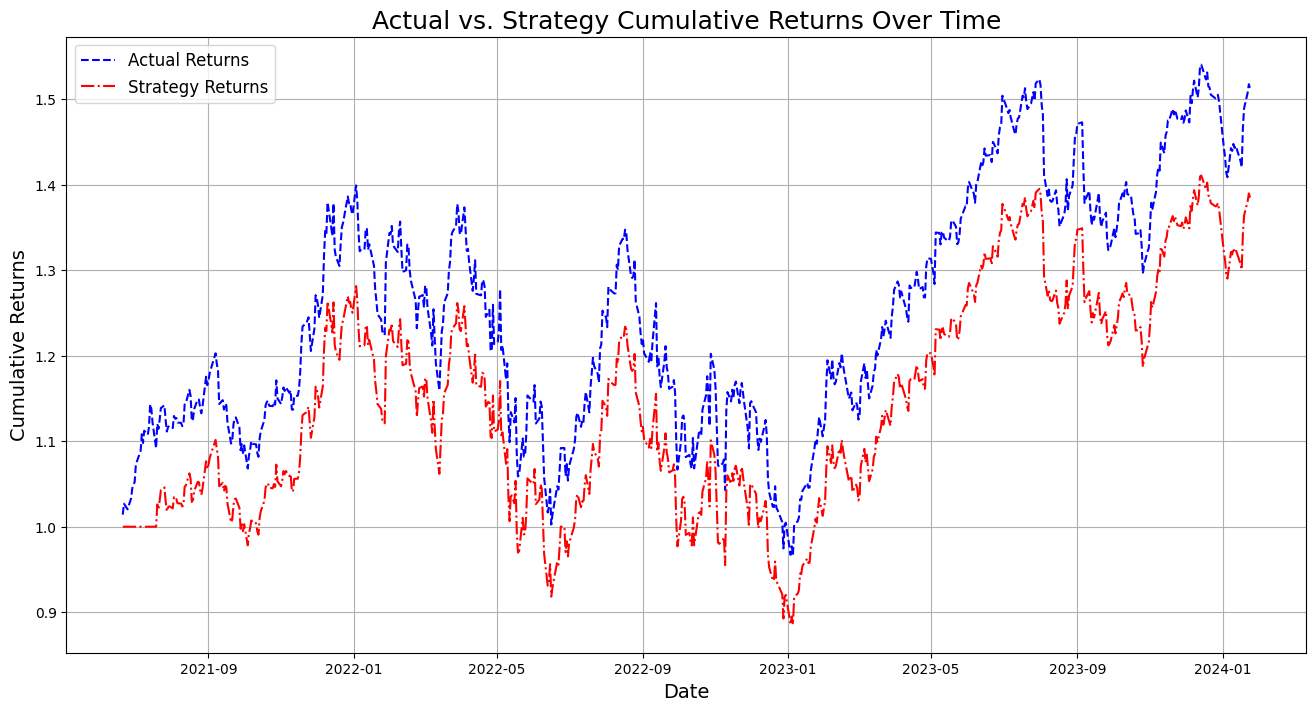


AdaBoost Model Performance Summary:

- Precision: 89.75%
  - Interpretation: The model correctly predicts positive outcomes 89.75% of the time. 
  - Limitation: While precision is high, it does not account for false negatives (type II errors).

- Recall: 9.80%
  - Interpretation: The model correctly identifies 9.80% of all actual positive outcomes. 
  - Limitation: A lower recall may indicate a higher number of false negatives.

- F1 Score: 6.80%
  - Interpretation: The F1 Score, which balances precision and recall, is 6.80%, indicating the model's overall effectiveness in classifying data.

Strategy Performance Analysis:
- The plot of 'Actual vs. Strategy Cumulative Returns Over Time' shows how the model's predictions would have performed in a trading scenario. 
- If the 'Strategy Returns' line closely follows or outperforms the 'Actual Returns', it suggests that the model's predictions are effective for this particular strategy.
- However, if the 'Strategy Returns' significantly und

In [19]:
# Making predictions
y_pred = adb_classifier.predict(X_test_scaled)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Create a predictions DataFrame
ada_predictions_df = pd.DataFrame(index=X_test.index)

# Add the AdaBoost model predictions to the DataFrame
ada_predictions_df['Predicted'] = y_pred

# Ensure that the index of signal_stock_df matches ada_predictions_df
# If not, you might need to align them correctly
ada_predictions_df['Actual Returns'] = signal_stock_df.loc[ada_predictions_df.index, "Actual Returns"]

# Add the strategy returns to the DataFrame
ada_predictions_df['Strategy Returns'] = ada_predictions_df["Actual Returns"] * ada_predictions_df["Predicted"]

# Handling NaN values if necessary
ada_predictions_df.dropna(inplace=True)

# Review the DataFrame
display(ada_predictions_df.head())
display(ada_predictions_df.tail())

# Plot the actual returns versus the strategy returns
cumulative_returns_plot = (1 + ada_predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod()

plt.figure(figsize=(16, 8))
plt.plot(cumulative_returns_plot['Actual Returns'], label='Actual Returns', color='blue', linestyle='--')
plt.plot(cumulative_returns_plot['Strategy Returns'], label='Strategy Returns', color='red', linestyle='-.')

plt.title('Actual vs. Strategy Cumulative Returns Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate key metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Generate the concluding statement
statement = f"""
AdaBoost Model Performance Summary:

- Precision: {precision:.2%}
  - Interpretation: The model correctly predicts positive outcomes {precision:.2%} of the time. 
  - Limitation: While precision is high, it does not account for false negatives (type II errors).

- Recall: {recall:.2%}
  - Interpretation: The model correctly identifies {recall:.2%} of all actual positive outcomes. 
  - Limitation: A lower recall may indicate a higher number of false negatives.

- F1 Score: {f1:.2%}
  - Interpretation: The F1 Score, which balances precision and recall, is {f1:.2%}, indicating the model's overall effectiveness in classifying data.

Strategy Performance Analysis:
- The plot of 'Actual vs. Strategy Cumulative Returns Over Time' shows how the model's predictions would have performed in a trading scenario. 
- If the 'Strategy Returns' line closely follows or outperforms the 'Actual Returns', it suggests that the model's predictions are effective for this particular strategy.
- However, if the 'Strategy Returns' significantly underperform compared to 'Actual Returns', it suggests limitations in the model's predictive power or the strategy's design.

Overall, while the AdaBoost model shows promising precision and a balanced F1 score, its effectiveness in a trading context needs careful consideration, especially if 'Strategy Returns' are not aligning with 'Actual Returns'. Further refinement in the model or strategy may be necessary for better alignment with market performance.
"""

print(statement)

#### Define the best base estimator

In [20]:
# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=2)

# Instantiate an AdaBoostClassifier
adb_classifier = AdaBoostClassifier(base_estimator=base_estimator)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Set up the grid search
grid_search = GridSearchCV(adb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model using the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}


### Support Vector Model

In [21]:
print("Classes in training set:", np.unique(y_train))
print("Classes in test set:", np.unique(y_test))

Classes in training set: [-1  0  1]
Classes in test set: [-1  0  1]


Precision: 0.7970962151361721
ROC AUC Score: 0.5883625482742223


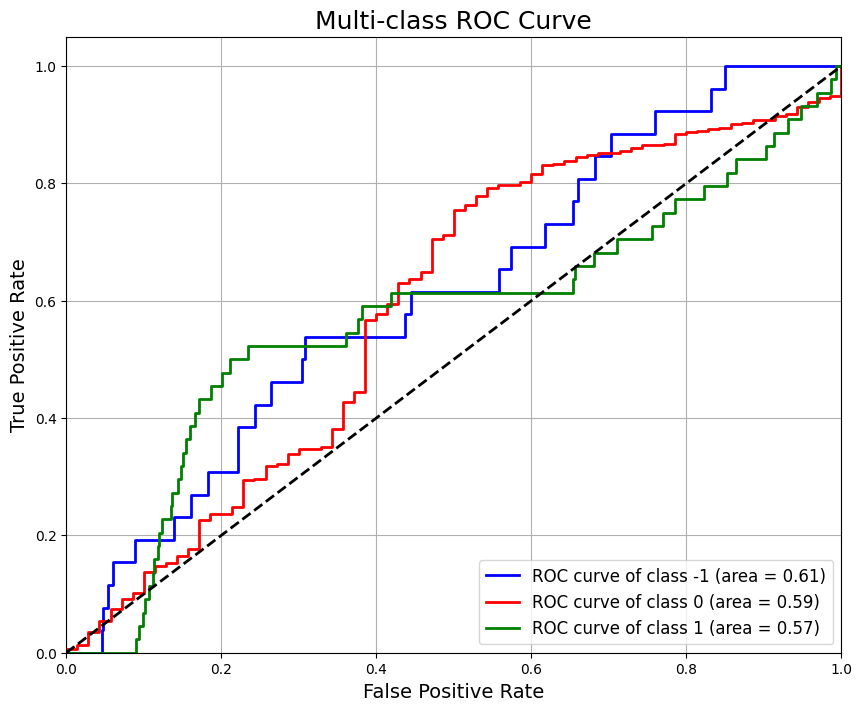


Model Performance Summary:
- Precision: 79.71%
  - Interpretation: When our model predicts an outcome, it is correct approximately 79.71% of the time. 
  - Limitation: High precision indicates that the model is good at identifying positive outcomes, but it does not reflect how well the model identifies negative outcomes.

- Average ROC AUC Score: 58.92%
  - Interpretation: The model's average ability to distinguish between the different possible outcomes is about 58.92%, which is slightly better than a random guess. 
  - Limitation: An average score closer to 50% suggests that the model's overall classification ability is not very strong. It might not be reliably differentiating between all classes, which is crucial in a multi-class setting.

Overall, while the model shows a high rate of precision, its ability to accurately classify all possible outcomes is moderate. Care should be taken when using this model for critical decisions, and further improvements and evaluations are recomme

In [22]:
# Create an SVC model with a pipeline
svc_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))

# Fit the model
svc_model.fit(X_train_scaled, y_train)

# Get probabilities for each class
svc_probabilities = svc_model.predict_proba(X_test_scaled)

# Make predictions
svc_predictions = svc_model.predict(X_test_scaled)

# Evaluate the model using precision
precision = precision_score(y_test, svc_predictions, average='weighted', zero_division=0)

# Define the unique classes
classes = np.unique(np.concatenate((y_train, y_test)))

# Compute ROC AUC Score
# Use the labels parameter to specify the class labels
roc_auc = roc_auc_score(y_test, svc_probabilities, average='weighted', multi_class='ovr', labels=classes)

print(f"Precision: {precision}")
print(f"ROC AUC Score: {roc_auc}")

# Binarize the output
y_bin = label_binarize(y_test, classes=classes)
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], svc_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = ['blue', 'red', 'green', 'purple', 'orange']  # Adjust based on n_classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Multi-class ROC Curve', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

# Result 
# Calculate the average ROC AUC score
average_roc_auc = np.mean(list(roc_auc.values()))

# Generate the statement using an f-string for formatting
statement = f"""
Model Performance Summary:
- Precision: {precision:.2%}
  - Interpretation: When our model predicts an outcome, it is correct approximately {precision:.2%} of the time. 
  - Limitation: High precision indicates that the model is good at identifying positive outcomes, but it does not reflect how well the model identifies negative outcomes.

- Average ROC AUC Score: {average_roc_auc:.2%}
  - Interpretation: The model's average ability to distinguish between the different possible outcomes is about {average_roc_auc:.2%}, which is slightly better than a random guess. 
  - Limitation: An average score closer to 50% suggests that the model's overall classification ability is not very strong. It might not be reliably differentiating between all classes, which is crucial in a multi-class setting.

Overall, while the model shows a high rate of precision, its ability to accurately classify all possible outcomes is moderate. Care should be taken when using this model for critical decisions, and further improvements and evaluations are recommended.
"""

print(statement)

## Sentiment Analysis

‘BeautifulSoup’ is needed to parse data from FinViz while ‘requests’ is needed to get data. ‘Pandas’ is used to store the data in DataFrames while ‘Matplotlib’ is used to plot the sentiment on a chart. Finally, the ‘nltk.sentiment.vader’ library is used to perform sentiment analysis on the news headlines!

[Source code](https://medium.datadriveninvestor.com/sentiment-analysis-of-stocks-from-financial-news-using-python-82ebdcefb638)

In [23]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mohjaiswal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
# Store the Date, Time and News Headlines Data

finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = [ticker]
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table
print(news_table)

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer news-table" id="news-table" width="100%">
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'The Economist', 'https://finance.yahoo.com/news/could-bring-apple-down-220226691.html');">
<td align="right" width="130">
            Today 05:02PM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/news/could-bring-apple-down-220226691.html" rel="nofollow" target="_blank">What could bring Apple down?</a>
</div>
<div class="news-link-right">
<span>(The Economist)</span></div></div></td></tr>
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'The Telegraph', 'https://finance.yahoo.com/m/4634185d-9309-32a4-8b45-74b9028e3bdd/tesla-hit-by-first-ever-drop.html');">
<td align="right" width="130">
            04:56PM
        </td>
<td align="left">
<div class="news-link-container">
<div 

In [30]:
# Print the Data Stored in news_tables
# Read one single day of headlines for ticker_input 
tckr = news_tables[ticker]
# Get all the table rows tagged in HTML with  into 'amzn_tr'
tckr_tr = tckr.findAll('tr')
for i, table_row in enumerate(tckr_tr):
 # Read the text of the element 'a' into 'link_text'
 a_text = table_row.a.text
 # Read the text of the element 'td' into 'data_text'
 td_text = table_row.td.text
 # Print the contents of 'link_text' and 'data_text' 
 print(a_text)
 print(td_text)
 # Exit after printing 4 rows of data
 if i == 3:
  break

parsed_news = []

# Iterate through all tr tags in 'news_table'
for x in tckr_tr:
    # Extract text from the 'a' tag
    text = x.a.get_text() 

    # Split text in the 'td' tag into a list 
    date_scrape = x.td.text.split()

    # Check if date_scrape has at least 2 elements (date and time)
    if len(date_scrape) >= 2:
        date = date_scrape[0]
        time = date_scrape[1]
    else:
        continue  # Skip this iteration if date_scrape is not as expected

    # Append ticker, date, time, and headline as a list to the 'parsed_news' list
    parsed_news.append([ticker, date, time, text])

# Convert parsed_news to a DataFrame
parsed_news = pd.DataFrame(parsed_news, columns=['ticker', 'date', 'time', 'headline'])

# Replace 'Today' with the current date
current_date = datetime.date.today().strftime('%Y-%m-%d')
parsed_news['date'] = parsed_news['date'].replace('Today', current_date)

# Convert the 'date' column from string to datetime
parsed_news['date'] = pd.to_datetime(parsed_news['date']).dt.date

parsed_news.head()

What could bring Apple down?

            Today 05:02PM
        
Tesla hit by first ever drop in annual profits amid electric car price war

            04:56PM
        
Netflix and Spotify Snub Vision Pro, YouTube Dragging Feet With Vision Pro, Apple TV+ Was the Right Bet for Apple

            04:10PM
        
Tesla has been the only stinker of the 'Magnificent Seven' tech stocks as Microsoft joins Apple in the $3 trillion club

            03:57PM
        


,ticker,date,time,headline
0,AAPL,2024-01-24,05:02PM,What could bring Apple down?
1,AAPL,2024-01-23,09:46PM,Apple unveils new anti-theft feature for iPhon...
2,AAPL,2024-01-22,11:14PM,India sees surging electronics exports thanks ...
3,AAPL,2024-01-21,12:15PM,4 Things You Need to Know Before You Rush to B...
4,AAPL,2024-01-20,05:13PM,22 Most Famous Hedge Fund Managers and Their T...


In [31]:
print(parsed_news.head())

  ticker        date     time  \
0   AAPL  2024-01-24  05:02PM   
1   AAPL  2024-01-23  09:46PM   
2   AAPL  2024-01-22  11:14PM   
3   AAPL  2024-01-21  12:15PM   
4   AAPL  2024-01-20  05:13PM   

                                            headline  
0                       What could bring Apple down?  
1  Apple unveils new anti-theft feature for iPhon...  
2  India sees surging electronics exports thanks ...  
3  4 Things You Need to Know Before You Rush to B...  
4  22 Most Famous Hedge Fund Managers and Their T...  


In [32]:
# Ensure parsed_news is a DataFrame
if not isinstance(parsed_news, pd.DataFrame):
    # Assuming that parsed_news is a list of lists and has a header row
    parsed_news = pd.DataFrame(parsed_news[1:], columns=parsed_news[0])

# Replace 'Today' with the current date
current_date = datetime.date.today().strftime('%Y-%m-%d')  # Format: YYYY-MM-DD
parsed_news['date'] = parsed_news['date'].replace('Today', current_date)

# Convert the 'date' column from string to datetime
parsed_news['date'] = pd.to_datetime(parsed_news['date']).dt.date

parsed_news.head()

,ticker,date,time,headline
0,AAPL,2024-01-24,05:02PM,What could bring Apple down?
1,AAPL,2024-01-23,09:46PM,Apple unveils new anti-theft feature for iPhon...
2,AAPL,2024-01-22,11:14PM,India sees surging electronics exports thanks ...
3,AAPL,2024-01-21,12:15PM,4 Things You Need to Know Before You Rush to B...
4,AAPL,2024-01-20,05:13PM,22 Most Famous Hedge Fund Managers and Their T...


In [33]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()
# Set column names
columns = ['ticker_name', 'date', 'time', 'headline']
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)
# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()
# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')
# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date
parsed_and_scored_news.head()

,ticker_name,date,time,headline,neg,neu,pos,compound
0,NaN,2024-01-24,05:02PM,What could bring Apple down?,0.0,1.000,0.000,0.0000
1,NaN,2024-01-23,09:46PM,Apple unveils new anti-theft feature for iPhon...,0.0,1.000,0.000,0.0000
2,NaN,2024-01-22,11:14PM,India sees surging electronics exports thanks ...,0.0,0.734,0.266,0.4404
3,NaN,2024-01-21,12:15PM,4 Things You Need to Know Before You Rush to B...,0.0,1.000,0.000,0.0000
4,NaN,2024-01-20,05:13PM,22 Most Famous Hedge Fund Managers and Their T...,0.0,0.847,0.153,0.2023


In [34]:
from statistics import mean

# Assuming 'parsed_and_scored_news' is your DataFrame with VADER sentiment scores

# Calculate the average sentiment score
average_score = mean(parsed_and_scored_news['compound'])

# Define thresholds for sentiment
positive_threshold = 0.5
negative_threshold = -0.5

# Generate investment recommendation
if average_score > positive_threshold:
    recommendation = "Market sentiment is positive. It's a favorable time to invest carefree."
elif average_score < negative_threshold:
    recommendation = "Market sentiment is negative. It's advisable to invest with caution or consult a professional."
else:
    recommendation = "Market sentiment is neutral. Proceed with balanced caution in your investment decisions."

print("Average Sentiment Score:", average_score)
print("Recommendation:", recommendation)


Average Sentiment Score: 0.13676666666666668
Recommendation: Market sentiment is neutral. Proceed with balanced caution in your investment decisions.


In [39]:
# Assuming sentiment_score is the average sentiment score for the stock
sentiment_score = average_score
# Assess market sentiment
if sentiment_score > 0.5:
    sentiment_analysis = "The market sentiment is predominantly positive."
    sentiment_advice = "This suggests potential for growth, but remain vigilant as market conditions can change."
elif sentiment_score < -0.5:
    sentiment_analysis = "The market sentiment is predominantly negative."
    sentiment_advice = "It's advisable to proceed with caution or consider diversifying your portfolio."
else:
    sentiment_analysis = "The market sentiment is neutral."
    sentiment_advice = "Maintain a balanced investment approach."

# Rationale for additional insights based on returns comparison
additional_insights = "If the strategy returns closely follow or exceed actual returns, this suggests effectiveness in the model's predictions. Conversely, significant underperformance might indicate a need for strategy revision."

# Rationale for final advice based on combined analysis
final_advice = "Considering both the technical and sentiment analysis, it's recommended to monitor the stock closely for market changes and reassess the strategy periodically."

# Assuming sentiment_score, precision, and average_roc_auc are already defined

# Calculate an overall score (example calculation)
overall_score = (sentiment_score + precision + average_roc_auc) / 3

# Define thresholds for strong buy, hold, and strong sell
strong_buy_threshold = 0.7  # Adjust thresholds as needed
strong_sell_threshold = 0.3

# Determine the recommendation
if overall_score >= strong_buy_threshold:
    stock_recommendation = "Strong Buy"
elif overall_score <= strong_sell_threshold:
    stock_recommendation = "Strong Sell"
else:
    stock_recommendation = "Hold"

# Combine with the AdaBoost model summary
statement = f"""
Stock Recommendation System - Ticker: {ticker}

Model Performance Summary:
- Precision: {precision:.2%}
  - Interpretation: The model correctly predicts positive outcomes {precision:.2%} of the time.
- Average ROC AUC Score: {average_roc_auc:.2%}
  - Interpretation: The model's average ability to distinguish between different outcomes is {average_roc_auc:.2%}.

Market Sentiment Analysis:
- Sentiment Score: {sentiment_score:.2f}
  - {sentiment_analysis}
  - {sentiment_advice}

Strategy Performance Analysis:
- Strategy Returns vs. Actual Returns comparison indicates the effectiveness of the model's predictions in a trading scenario.
- {additional_insights}

Overall Recommendation:
- Based on the combined analysis of technical indicators and market sentiment, the recommendation for this stock is a '{stock_recommendation}'.
- While the model shows promising precision and sentiment trends, it is crucial to consider market volatility and external factors.
- {final_advice}"""

print(statement)



Stock Recommendation System - Ticker: AAPL

Model Performance Summary:
- Precision: 79.71%
  - Interpretation: The model correctly predicts positive outcomes 79.71% of the time.
- Average ROC AUC Score: 58.92%
  - Interpretation: The model's average ability to distinguish between different outcomes is 58.92%.

Market Sentiment Analysis:
- Sentiment Score: 0.14
  - The market sentiment is neutral.
  - Maintain a balanced investment approach.

Strategy Performance Analysis:
- Strategy Returns vs. Actual Returns comparison indicates the effectiveness of the model's predictions in a trading scenario.
- If the strategy returns closely follow or exceed actual returns, this suggests effectiveness in the model's predictions. Conversely, significant underperformance might indicate a need for strategy revision.

Overall Recommendation:
- Based on the combined analysis of technical indicators and market sentiment, the recommendation for this stock is a 'Hold'.
- While the model shows promising p

## BackTesting of fast&slow SMA

In [ ]:
class MyStrategy(bt.Strategy):
    params = (
        ('fast_sma_period', 15),
        ('slow_sma_period', 100),
        ('rsi_period', 14),
        ('rsi_overbought', 70),
        ('rsi_oversold', 30),
    )

    def __init__(self):
        self.fast_sma = bt.indicators.SMA(self.data.close, period=self.params.fast_sma_period)
        self.slow_sma = bt.indicators.SMA(self.data.close, period=self.params.slow_sma_period)
        self.rsi = bt.indicators.RSI(self.data.close, period=self.params.rsi_period)

    def next(self):
        # Buy Logic: RSI < 30 and Fast SMA > Slow SMA
        if not self.position and self.rsi < self.params.rsi_oversold and self.fast_sma > self.slow_sma:
            self.buy()

        # Sell Logic: RSI > 70 and Fast SMA < Slow SMA
        elif self.position and self.rsi > self.params.rsi_overbought and self.fast_sma < self.slow_sma:
            self.sell()

# Create a Cerebro engine instance and set up the environment as shown in the previous example

if __name__ == '__main__':
    # Create a Cerebro engine instance
    cerebro = bt.Cerebro()
    
    # Add data feed
    data = bt.feeds.PandasData(dataname=processed_stock_df)
    cerebro.adddata(data)
    
    # Add strategy
    cerebro.addstrategy(MyStrategy)
    
    # Run backtest
    cerebro.run()
    
    # Plot results
    cerebro.plot()
